In [1]:
install.packages("reactable")
library(reactable)
library(ggplot2)
library(tidyverse)
library(broom)
library(dplyr)
library(knitr)
womenwinning_df <- read.csv("officeholders_race_ethnicity.csv")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘knitr’ was built under R version 4.0.1”


### Intial exploring

In [2]:
head(womenwinning_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [3]:
table_of_race <- table(womenwinning_df["race_ethnicity"])
head(table_of_race)


                                     Asian/Pacific Islander 
                                                        634 
                                     Black/African American 
                                                       3695 
                                            Hispanic/Latina 
                                                       1397 
                               Middle Eastern/North African 
                                                         22 
                                                Multiracial 
                                                         15 
Multiracial, Black/African American, Asian/Pacific Islander 
                                                         18 

In [4]:
table_of_levels <- table(womenwinning_df["level"])
head(table_of_levels)


   Federal/Congress   State Legislative Statewide Executive    Territorial/D.C. 
               1381               24540                1017                 112 

In [5]:
table_of_positions <- table(womenwinning_df["position"])
head(table_of_positions)


             Agriculture         Attorney General                  Auditor 
                       9                       98                      106 
 Chief Financial Officer              Comptroller Corporation Commissioner 
                       3                       40                       34 

### Making a dataframe with only the State Legislators

In [6]:
state_leg_df <- womenwinning_df%>%filter(level == "State Legislative")
        
head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [7]:
dim(state_leg_df) 

[1] 24540    11

In [8]:
tbl_of_positions2 <- table(state_leg_df["position"])
print(tbl_of_positions2) #checking for cleanness


State Representative        State Senator 
               18620                 5920 


### Looking at Women by State, Year, Race, Region

In [9]:
tbl_by_state <- table(state_leg_df["state"]) #gotta convert this to a string, 
                                             #and then we could do percents too
print(tbl_by_state) #raw number based on location


       Alabama - AL         Alaska - AK        Arizona - AZ       Arkansas - AR 
                262                 218                 428                 369 
    California - CA       Colorado - CO    Connecticut - CT       Delaware - DE 
                425                 542                 729                 202 
       Florida - FL        Georgia - GA           Guam - GU         Hawaii - HI 
                559                 750                  11                 316 
         Idaho - ID       Illinois - IL        Indiana - IN           Iowa - IA 
                392                 763                 423                 466 
        Kansas - KS       Kentucky - KY      Louisiana - LA          Maine - ME 
                596                 325                 280                 770 
      Maryland - MD  Massachusetts - MA       Michigan - MI      Minnesota - MN 
                805                 684                 467                 872 
   Mississippi - MS       M

In [10]:
state_leg_yr <- state_leg_df%>%
    group_by(year) %>%
    summarize(
        count = n())
print(state_leg_yr)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 13 x 2
    year count
   <int> <int>
 1  2008  1782
 2  2009  1839
 3  2010  1844
 4  2011  1786
 5  2012  1778
 6  2013  1828
 7  2014  1829
 8  2015  1846
 9  2016  1828
10  2017  1893
11  2018  1914
12  2019  2169
13  2020  2204


In [11]:
state_leg_race <- state_leg_df%>%
    group_by(race_ethnicity == "White") %>%
    summarize(count = n())
print(state_leg_race)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 2 x 2
  `race_ethnicity == "White"` count
  <lgl>                       <int>
1 FALSE                        5483
2 TRUE                        19057


In [12]:
state_leg_race <- state_leg_df%>%       #it's a little weird that "White" doesn't come up here?
group_by(race_ethnicity) %>%
    summarize(count = n())
print(state_leg_race)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 21 x 2
   race_ethnicity                                              count
   <chr>                                                       <int>
 1 Asian/Pacific Islander                                        497
 2 Black/African American                                       3412
 3 Hispanic/Latina                                              1181
 4 Middle Eastern/North African                                   18
 5 Multiracial                                                    13
 6 Multiracial, Black/African American, Asian/Pacific Islander     2
 7 Multiracial, Black/African American, Hispanic/Latina           13
 8 Multiracial, Black/African American, Native American           13
 9 Multiracial, Hispanic/Latina, Asian/Pacific Islander           15
10 Multiracial, Hispanic/Latina, Native American                  10
# … with 11 more rows


In [13]:
head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [14]:
states_northeast <- c("Connecticut - CT", "Delaware - DE", "Maine - ME", "Massachusetts - MA",
                      "New Hampshire - NH", "New Jersey - NJ", "New York - NY", "Pennsylvania - PA", 
                      "Rhode Island - RI", "Vermont - VT")
states_west <- c("Alaska - AK", "Arizona - AZ", "California - CA", "Colorado - CO", "Hawaii - HI", "Idaho - ID", "Nevada - NV", "Montana - MT",
                 "New Mexico - NM", "Oregon - OR", "Washington - WA", "Wyoming - WY")
states_midwest <- c("Indiana - IN", "Illinois - IL", "Iowa - IA", "Kansas - KS", "Michigan - MI", "Minnesota - MN", "Missouri - MO", 
                    "Nebraska - NE", "North Dakota - ND", "Ohio - OH", "South Dakota - SD", "Wisconsin - WI")
states_south <- c("Alabama - AL", "Arkansas - AR", 
                  "Florida - FL", "Georgia - GA", "Kentucky - KY", "Louisiana - LA", "Maryland - MD", "Mississippi - MS", 
                  "North Carolina - NC", "Oklahoma - OK", "South Carolina - SC", "Tennessee - TN", "Texas - TX", 
                  "Virginia - VA", "West Virginia - WV")


# Replace "dataset" with name of your dataset
state_leg_df <- state_leg_df %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,region
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,West
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,South
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,South


In [15]:
state_leg_region <- state_leg_df%>%
    group_by(region) %>%
    summarize(count = n())
print(state_leg_region)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 5 x 2
  region    count
  <chr>     <int>
1 Midwest    5808
2 Northeast  7313
3 Other       286
4 South      6285
5 West       4848


In [16]:
state_leg_party <- state_leg_df%>%
    group_by(state, year)%>%
    summarize(
    prop_dem = mean(party == "Democrat"),
    count = n())
head(state_leg_party)

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,year,prop_dem,count
<chr>,<int>,<dbl>,<int>
Alabama - AL,2008,0.7777778,18
Alabama - AL,2009,0.8000000,20
Alabama - AL,2010,0.7894737,19
Alabama - AL,2011,0.6842105,19
Alabama - AL,2012,0.6842105,19
Alabama - AL,2013,0.6842105,19


In [17]:

state_leg_party_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(state, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander"),
    prop_repub = mean(party == "Republican"),
    prop_dem = mean(party == "Democrat")
    )
head(state_leg_party_2016)

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama - AL,2016,20,0.4000000,0.6000000,0.6000000,0.00000000,0,0,0.2500000,0.7000000
Alabama - AL,2017,21,0.3809524,0.6190476,0.6190476,0.00000000,0,0,0.2380952,0.7142857
Alabama - AL,2018,21,0.3809524,0.6190476,0.6190476,0.00000000,0,0,0.2380952,0.7142857
Alabama - AL,2019,23,0.3478261,0.6521739,0.6521739,0.00000000,0,0,0.3478261,0.6521739
Alabama - AL,2020,23,0.3478261,0.6521739,0.6521739,0.00000000,0,0,0.3478261,0.6521739
Alaska - AK,2016,17,0.8823529,0.1176471,0.0000000,0.05882353,0,0,0.8235294,0.1764706


In [18]:
print(kable(state_leg_party_2016))



|state               | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian| prop_repub|  prop_dem|
|:-------------------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|----------:|---------:|
|Alabama - AL        | 2016|    20|  0.4000000|     0.6000000|  0.6000000|     0.0000000|       0.0000000|  0.0000000|  0.2500000| 0.7000000|
|Alabama - AL        | 2017|    21|  0.3809524|     0.6190476|  0.6190476|     0.0000000|       0.0000000|  0.0000000|  0.2380952| 0.7142857|
|Alabama - AL        | 2018|    21|  0.3809524|     0.6190476|  0.6190476|     0.0000000|       0.0000000|  0.0000000|  0.2380952| 0.7142857|
|Alabama - AL        | 2019|    23|  0.3478261|     0.6521739|  0.6521739|     0.0000000|       0.0000000|  0.0000000|  0.3478261| 0.6521739|
|Alabama - AL        | 2020|    23|  0.3478261|     0.6521739|  0.6521739|     0.0000000|       0.0000000|  0.0000000|  0.3478261| 0.6521739|
|Ala

In [19]:
state_leg_region_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(region, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander"),
    prop_repub = mean(party == "Republican"),
    prop_dem = mean(party == "Democrat"))
head(state_leg_region_2016)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midwest,2016,437,0.8352403,0.1647597,0.12585812,0.02288330,0,0.004576659,0.4210526,0.5537757
Midwest,2017,449,0.8351893,0.1648107,0.11581292,0.02672606,0,0.004454343,0.4521158,0.5167038
Midwest,2018,452,0.8318584,0.1681416,0.11725664,0.02876106,0,0.004424779,0.4535398,0.5176991
Midwest,2019,508,0.8070866,0.1929134,0.11811024,0.03346457,0,0.013779528,0.3877953,0.5846457
Midwest,2020,510,0.8058824,0.1941176,0.11960784,0.03333333,0,0.013725490,0.3803922,0.5921569
Northeast,2016,541,0.8613678,0.1386322,0.08687616,0.03512015,0,0.007393715,0.3142329,0.6691312


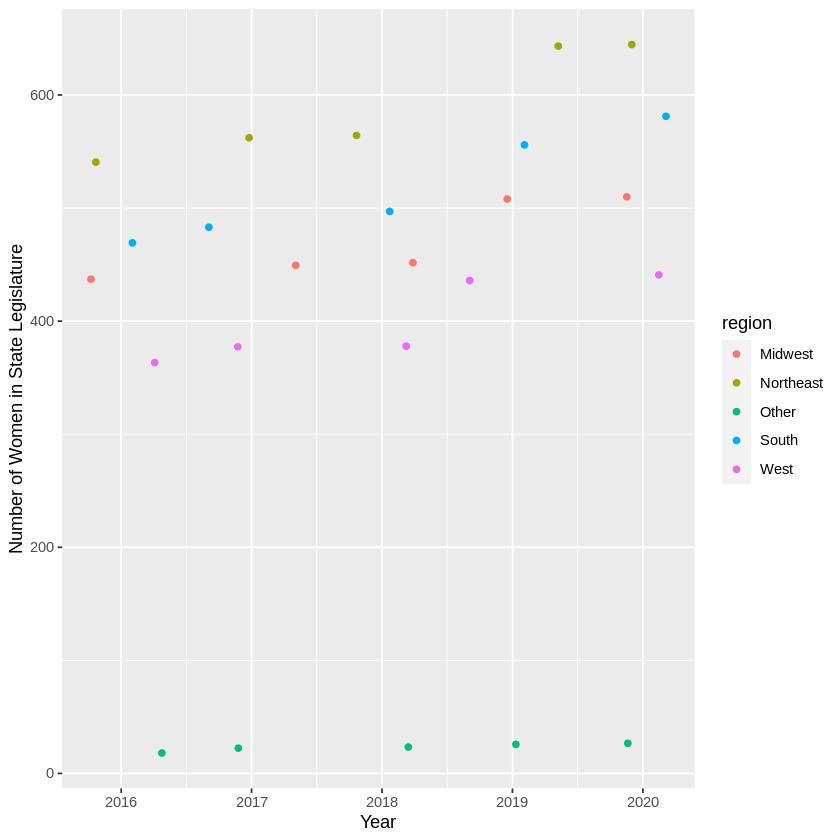

In [20]:
ggplot(state_leg_region_2016, aes(x = year, y = count, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Number of Women in State Legislature")


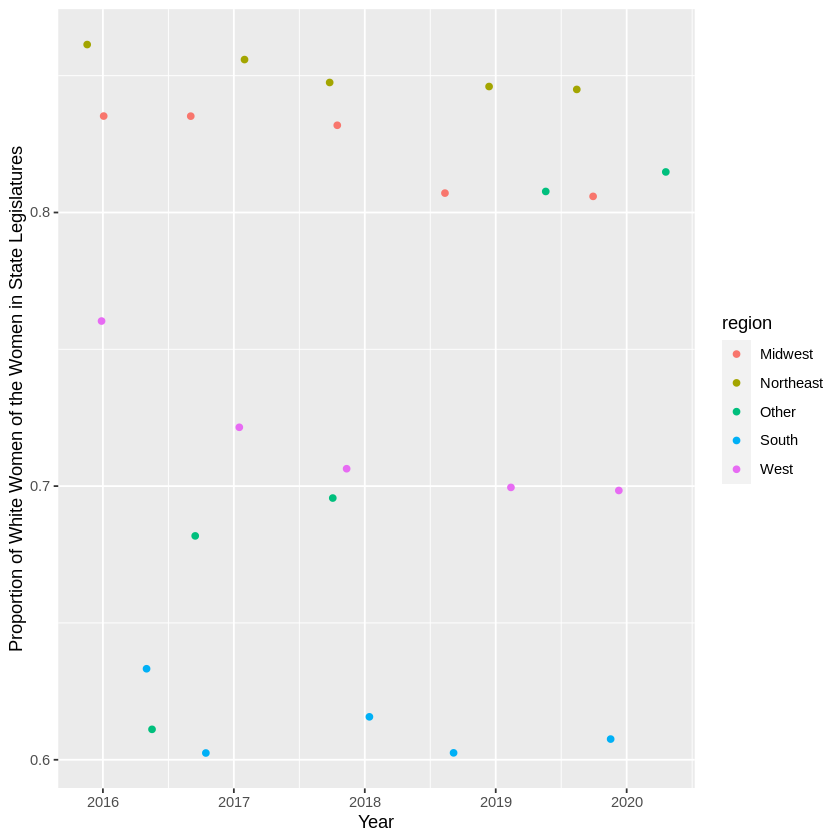

In [21]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_white, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of White Women of the Women in State Legislatures")

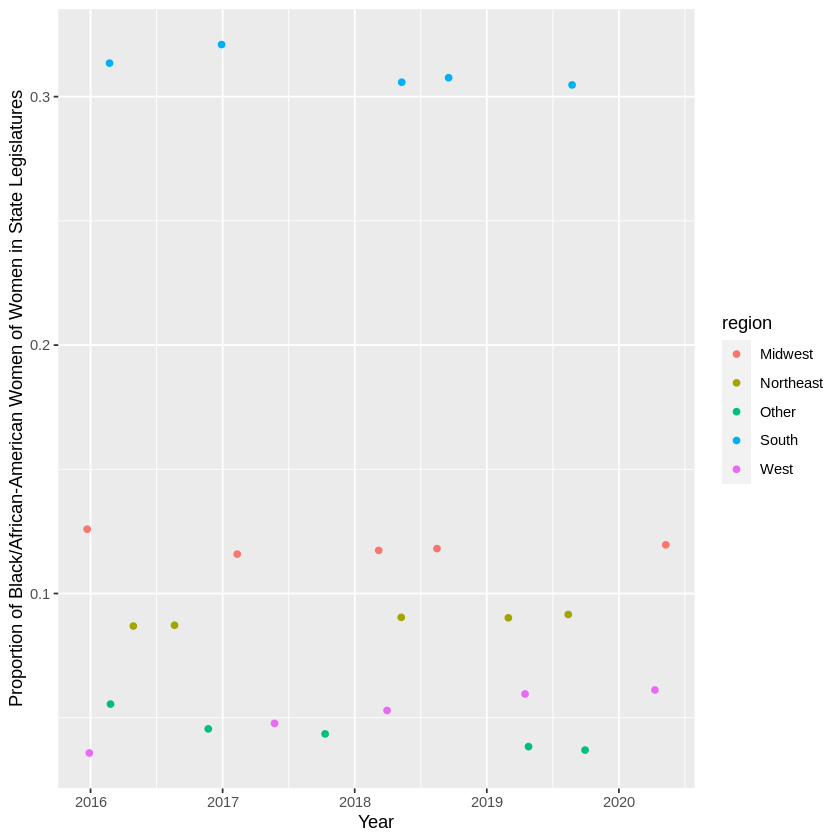

In [22]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_black, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Black/African-American Women of Women in State Legislatures")

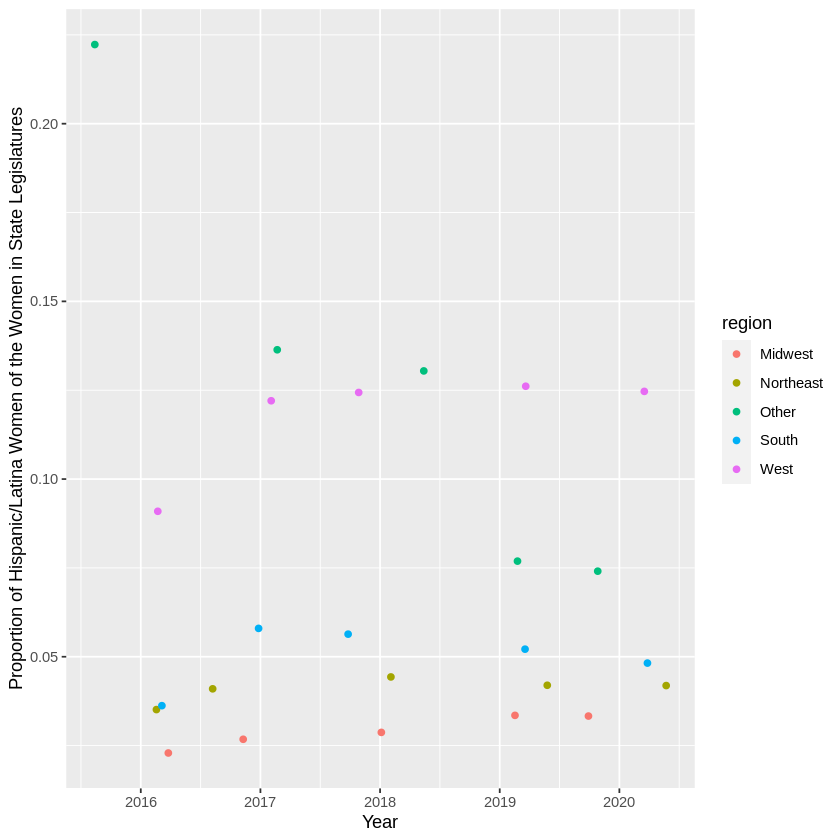

In [23]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_hispanic, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Hispanic/Latina Women of the Women in State Legislatures")

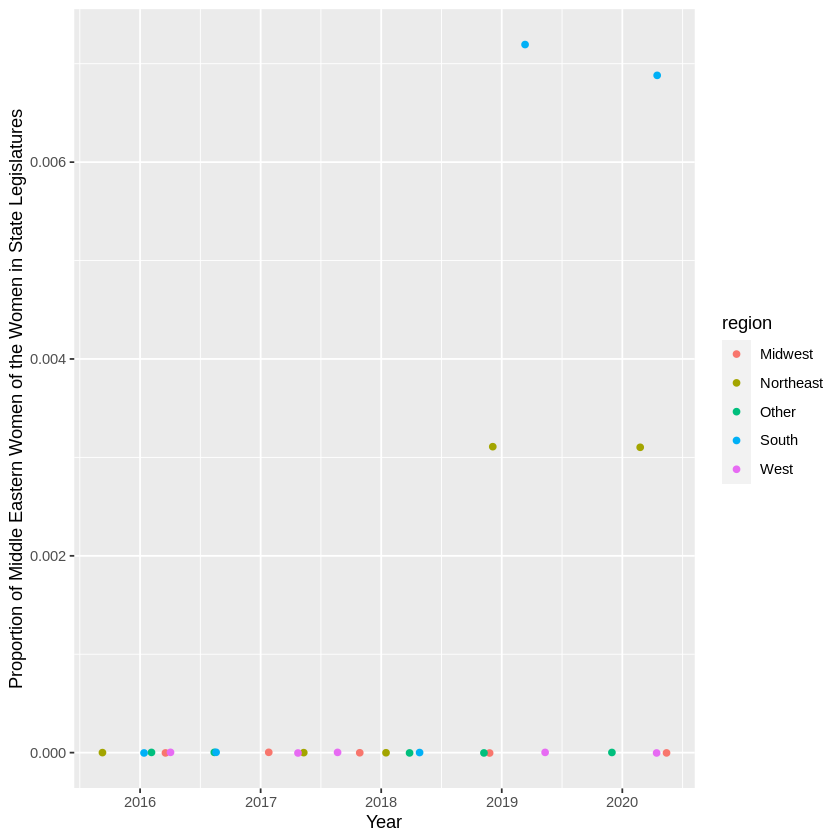

In [24]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_mideastern, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Middle Eastern Women of the Women in State Legislatures")

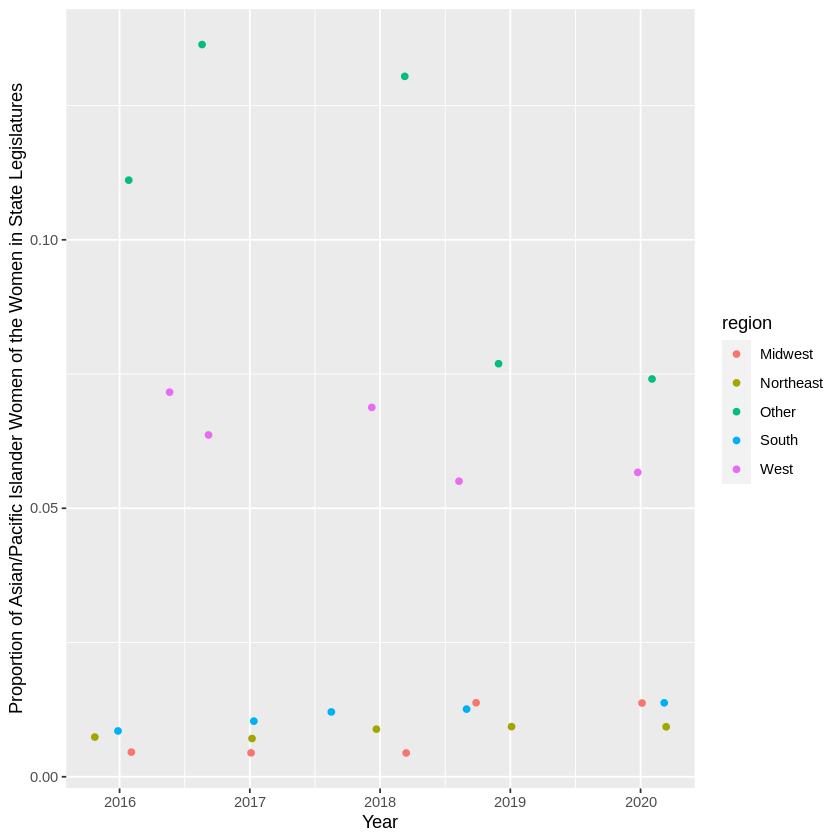

In [25]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_asian, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Asian/Pacific Islander Women of the Women in State Legislatures")

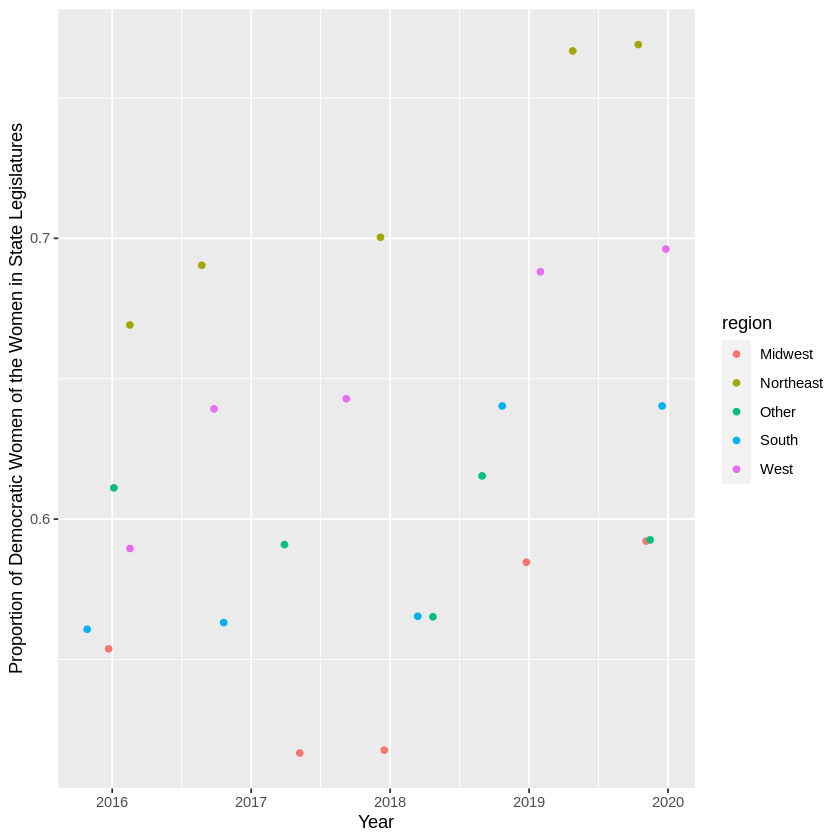

In [26]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_dem, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Democratic Women of the Women in State Legislatures")

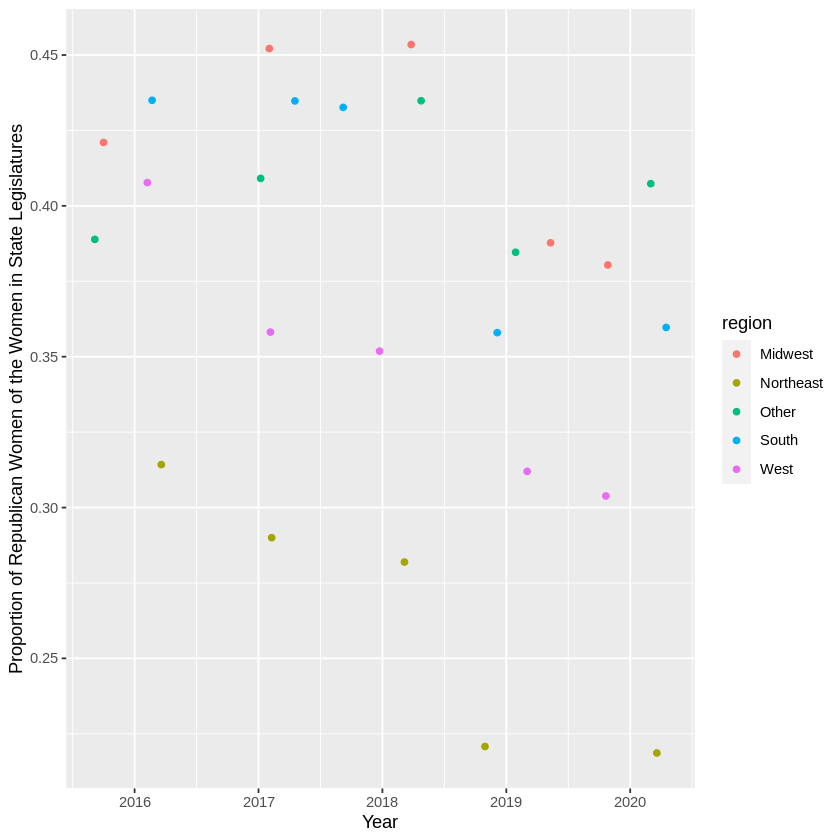

In [27]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_repub, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ylab("Proportion of Republican Women of the Women in State Legislatures")

In [28]:
print(kable(state_leg_region_2016))



|region    | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian| prop_repub|  prop_dem|
|:---------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|----------:|---------:|
|Midwest   | 2016|   437|  0.8352403|     0.1647597|  0.1258581|     0.0228833|       0.0000000|  0.0045767|  0.4210526| 0.5537757|
|Midwest   | 2017|   449|  0.8351893|     0.1648107|  0.1158129|     0.0267261|       0.0000000|  0.0044543|  0.4521158| 0.5167038|
|Midwest   | 2018|   452|  0.8318584|     0.1681416|  0.1172566|     0.0287611|       0.0000000|  0.0044248|  0.4535398| 0.5176991|
|Midwest   | 2019|   508|  0.8070866|     0.1929134|  0.1181102|     0.0334646|       0.0000000|  0.0137795|  0.3877953| 0.5846457|
|Midwest   | 2020|   510|  0.8058824|     0.1941176|  0.1196078|     0.0333333|       0.0000000|  0.0137255|  0.3803922| 0.5921569|
|Northeast | 2016|   541|  0.8613678|     0.1386322|  0.0868762|     0.035